In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## generate train/test & cross validation datasets from list with (image, joints, MET, label), generated from `analyzeMET.ipynb`

full model
* activity-met_n16.csv : 14 points
* activity-met_n16_ub.csv : 8 points

part model (10 classes)
* activity-met_n10.csv : 14 points
* activity-met_n10_ub.csv : 8 points

new part model 
* activity-met_n10_ub_new.csv


In [2]:
# read csv file
#CSV_FILENAME = 'activity-met_n16'
#CSV_FILENAME = 'activity-met_n16_ub'
#CSV_FILENAME = 'activity-met_n10'
#CSV_FILENAME = 'activity-met_n10_ub'
CSV_FILENAME = 'activity-met_n10_ub_new'  # MET3


MET2_joints = pd.read_csv(CSV_FILENAME+'.csv', header=None)

print(MET2_joints.shape)

# add column names 
%load_ext autoreload
%autoreload 2
from tools import met

MET2_joints.columns = met.generateColumnNames()

MET2_joints.head()

(600, 45)


,ID,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,v7,v8,v9,v10,v11,v12,v13,v14,MET,label
0,image/office activities/filing.seated/1.jpg,416,339,390,201,488,186,584,197,479,...,0,0,0,0,0,0,0,0,1.2,7
1,image/office activities/filing.seated/10.jpeg,185,3460,540,2802,1183,2264,1534,2358,858,...,0,0,0,0,0,0,0,0,1.2,7
2,image/office activities/filing.seated/11.bmp,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,1.2,7
3,image/office activities/filing.seated/12.jpeg,374,3144,582,2567,1088,2063,1477,2177,842,...,0,0,0,0,0,0,0,0,1.2,7
4,image/office activities/filing.seated/13.jpeg,1300,2970,808,2896,1103,2110,1493,2204,729,...,0,0,0,0,0,0,0,0,1.2,7


In [3]:
# count labels
label_bin = np.linspace(0,10,11)-1
MET2_joints["label"].value_counts(bins=label_bin, sort=False)


(-1.001, 0.0]    60
(0.0, 1.0]       60
(1.0, 2.0]       60
(2.0, 3.0]       60
(3.0, 4.0]       60
(4.0, 5.0]       60
(5.0, 6.0]       60
(6.0, 7.0]       60
(7.0, 8.0]       60
(8.0, 9.0]       60
Name: label, dtype: int64

Text(0,0.5,'count')

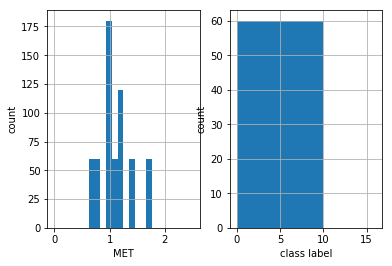

In [4]:

#MET2_joints[["MET","label"]].describe()
#MET2_joints["MET"].value_counts
#MET2_joints["label"].value_counts

plt.subplot(121)
MET2_joints["MET"].hist(bins=np.linspace(0., 2.5,25))
plt.xlabel('MET')
plt.ylabel('count')
plt.subplot(122)
MET2_joints["label"].hist(bins=np.linspace(0., 16, 17))
plt.xlabel('class label')
plt.ylabel('count')

# code below is for suffling

In [5]:
# Now let's shuffle!


# 1. set aside TEST dataset
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in split.split(MET2_joints, MET2_joints["label"]):
    # training set (90%)
    strat_train_set = MET2_joints.loc[train_index]
    strat_train_set.reset_index(drop=True, inplace=True) 
    
    strat_train_set.to_csv(CSV_FILENAME+'_train.csv', index = False, header = False)
    print(len(strat_train_set))    
    
    # test set (10%)
    strat_test_set = MET2_joints.loc[test_index]
    strat_test_set.reset_index(drop=True, inplace=True)
    
    strat_test_set.to_csv(CSV_FILENAME+'_test.csv', index = False, header = False)
    print(len(strat_test_set))    
    
    print(strat_train_set["label"].value_counts(sort=False))
    print(strat_test_set["label"].value_counts(sort=False))
    

540
60
0    54
1    54
2    54
3    54
4    54
5    54
6    54
7    54
8    54
9    54
Name: label, dtype: int64
0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: label, dtype: int64


### copy *new* upper body version (2018. 6. 25)

```
cp activity-met_n10_ub_new_train.csv /var/data/MET3/
cp activity-met_n10_ub_new_test.csv /var/data/MET3/

scp activity-met_n10_ub_new_train.csv beta.inu.ac.kr:/var/data/MET3/
scp activity-met_n10_ub_new_test.csv beta.inu.ac.kr:/var/data/MET3/

scp activity-met_n10_ub_new_train.csv omega.inu.ac.kr:/var/data/MET3/
scp activity-met_n10_ub_new_test.csv omega.inu.ac.kr:/var/data/MET3/
```

### copy upper body version (2018. 6. 25)

```
cp activity-met_n10_ub_train.csv /var/data/MET2/
cp activity-met_n10_ub_test.csv /var/data/MET2/

scp activity-met_n10_ub_train.csv beta.inu.ac.kr:/var/data/MET2/
scp activity-met_n10_ub_test.csv beta.inu.ac.kr:/var/data/MET2/

scp activity-met_n10_ub_train.csv omega.inu.ac.kr:/var/data/MET2/
scp activity-met_n10_ub_test.csv omega.inu.ac.kr:/var/data/MET2/
```


## cross-validation data sets

In [ ]:
# load saved file
# strat_train_set=pd.read_csv("activity-met_n{}_train.csv".format(numClass),header=None,names=colNames) # ,index_col=0)
# strat_test_set=pd.read_csv("activity-met_n{}_test.csv".format(numClass),header=None,names=colNames) # ,index_col=0)

# print(strat_train_set.shape)
# print(strat_test_set.shape)

# strat_train_set.head()

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit
# 2. divide the TRAINING dataset into k-fold for cross-validation

num_split = 5
split = StratifiedShuffleSplit(n_splits=num_split, test_size=1/num_split, random_state=42)



k = 0
for train_index, test_index in split.split(strat_train_set, strat_train_set["label"]):
    
    strat_train_train_set = strat_train_set.loc[train_index]
    #filename = "activity_wo_train_k{}.csv".format(k)
    #filename = "activity_wo_ub_train_k{}_{}.csv".format(k,num_split)
    #filename = "activity-met_n{}_train_k{}.csv".format(numClass, k)
    filename = "activity-met_n{}_ub_train_k{}.csv".format(numClass, k)
    
    #print(len(strat_train_set))
    strat_train_train_set.to_csv(filename, index = False, header = False)
    
    
    strat_val_set = strat_train_set.loc[test_index]
    #filename = "activity_wo_val_k{}.csv".format(k)    
    #filename = "activity_wo_ub_val_k{}_{}.csv".format(k,num_split)    
    #filename = "activity-met_n{}_val_k{}.csv".format(numClass, k)
    filename = "activity-met_n{}_ub_val_k{}.csv".format(numClass, k)
    
    strat_val_set.to_csv(filename, index = False, header = False)    
    #print(len(strat_test_set))    
    
    print(strat_train_train_set["label"].value_counts(sort=False))
    print(strat_val_set["label"].value_counts(sort=False))
    
    k = k +1

# full body version (2018. 6. 18)
#
# cp activity-met_n10_train_k?.csv /var/data/MET2/
# cp activity-met_n10_val_k?.csv /var/data/MET2/
# scp activity-met_n10_train_k?.csv beta.inu.ac.kr:/var/data/MET2/
# scp activity-met_n10_val_k?.csv beta.inu.ac.kr:/var/data/MET2/
# scp activity-met_n10_train_k?.csv omega.inu.ac.kr:/var/data/MET2/
# scp activity-met_n10_val_k?.csv omega.inu.ac.kr:/var/data/MET2/

# upper body version (2018. 6. 18)
#
# cp activity-met_n10_ub_train_k?.csv /var/data/MET2/
# cp activity-met_n10_ub_val_k?.csv /var/data/MET2/
# scp activity-met_n10_ub_train_k?.csv beta.inu.ac.kr:/var/data/MET2/
# scp activity-met_n10_ub_val_k?.csv beta.inu.ac.kr:/var/data/MET2/
# scp activity-met_n10_ub_train_k?.csv omega.inu.ac.kr:/var/data/MET2/
# scp activity-met_n10_ub_val_k?.csv omega.inu.ac.kr:/var/data/MET2/


In [ ]:
# TO CHECK 

#print(strat_train_set["label"].value_counts(bins=labels, sort=False))
#print(strat_test_set["label"].value_counts(bins=labels, sort=False))

plt.subplot(221)
MET2_joints["label"].hist()
plt.subplot(222)
strat_test_set["label"].hist()
plt.subplot(223)
strat_val_set["label"].hist()
plt.subplot(224)
strat_train_train_set["label"].hist()

In [ ]:
# check size

print(len(strat_train_set))
print(len(strat_test_set))


print(len(strat_train_train_set))
print(len(strat_val_set))


